In [1]:
#importing libraries 

import pandas as pd
import numpy as np
df = pd.read_csv('Salary_Data.csv')

In [2]:
# file summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [3]:
# Further checking if there is any null value in any of the column
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
# finding the count of the rows, mean, standared deviation, min & max value, and percentile of each column/feature
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# separately dealing with the columns for description
df['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

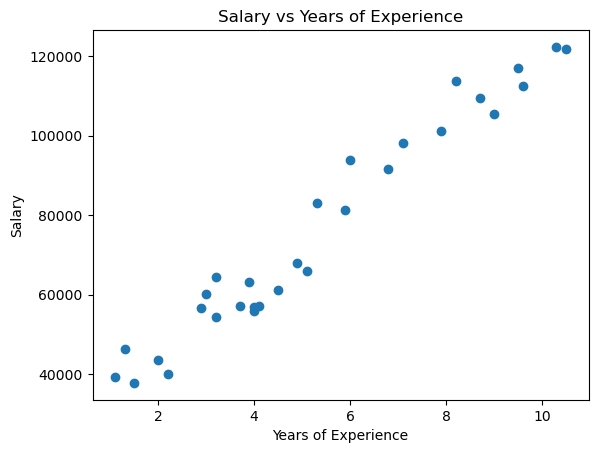

In [6]:
# importing matplotlib for scatter plot of salary vs years of experience
import matplotlib.pyplot as plt
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show() # it removes description line from the top fo the plot

In [7]:
# Assigning the values to x axes, drop method remove output column from the data and rest of all columns assigned to the x axes
X = df.drop(columns='Salary')  # this method is only valid for this cell, it doesn't remove salary column from actual file
y = df['Salary'] # output column is assigned to y axes

In [8]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [9]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [10]:
# it divide data in 4 parts. two aprts of x axes(first for training, second for test) and two parts of y axes (first for training, second for test)
from sklearn.model_selection import train_test_split
print(train_test_split(X,y, test_size = 0.2))

[    YearsExperience
1               1.3
12              4.0
17              5.3
11              4.0
6               3.0
5               2.9
16              5.1
24              8.7
3               2.0
22              7.9
2               1.5
25              9.0
9               3.7
7               3.2
10              3.9
28             10.3
23              8.2
26              9.5
29             10.5
13              4.1
8               3.2
14              4.5
0               1.1
18              5.9,     YearsExperience
15              4.9
19              6.0
4               2.2
21              7.1
27              9.6
20              6.8, 1      46205.0
12     56957.0
17     83088.0
11     55794.0
6      60150.0
5      56642.0
16     66029.0
24    109431.0
3      43525.0
22    101302.0
2      37731.0
25    105582.0
9      57189.0
7      54445.0
10     63218.0
28    122391.0
23    113812.0
26    116969.0
29    121872.0
13     57081.0
8      64445.0
14     61111.0
0      39343.0
18     81363

In [11]:
# Asigning values for training and testing to the variables 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [12]:
#Choosing ML model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
# Train the model
model.fit(x_train,y_train)

LinearRegression()

In [14]:
print(model.intercept_)
print(model.coef_)
print(model.coef_,'* X', '+', model.intercept_) # equation of this linear regression model

26288.539963355543
[9422.65825023]
[9422.65825023] * X + 26288.539963355543


In [15]:
print(model.coef_ * 1.1 + model.intercept_)

[36653.46403861]


In [16]:
# predicting the output
y_pred = model.predict(x_test)
y_pred

array([ 82824.48946472,  63979.17296426,  61152.3754892 ,  53614.24888901,
        63979.17296426, 111092.4642154 ])

In [17]:
model.predict([[10]])

C:\Users\hafee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([120515.12246563])

In [18]:
# error calculation
from sklearn.metrics import mean_squared_error, r2_score
print('MSE = ', mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 = ', r2_score(y_test, y_pred))

MSE =  49183896.99709045
RMSE =  7013.123198482289
R2 =  0.8841587365170224


In [19]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'MAE':(y_test-y_pred)})


,y_test,y_pred,MAE
19,93940.0,82824.489465,11115.510535
11,55794.0,63979.172964,-8185.172964
9,57189.0,61152.375489,-3963.375489
5,56642.0,53614.248889,3027.751111
12,56957.0,63979.172964,-7022.172964
25,105582.0,111092.464215,-5510.464215


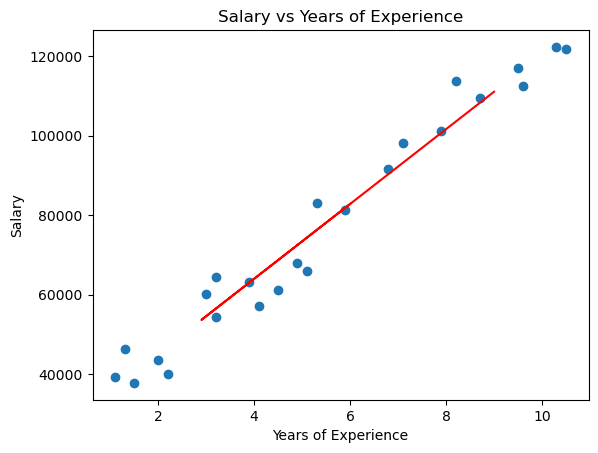

In [20]:
#training data
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred, color='r')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

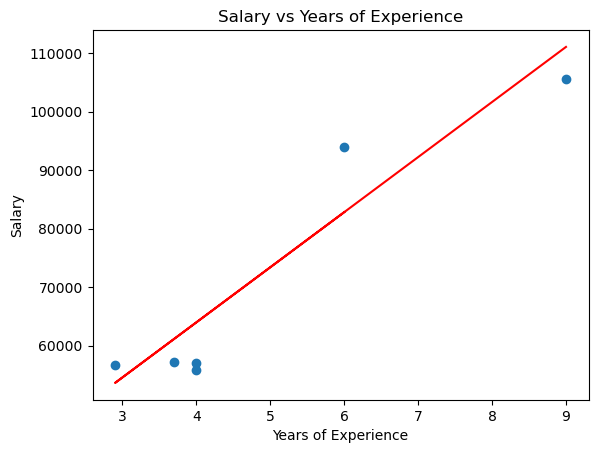

In [21]:
# test data
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, color='r')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()